In [358]:
from pylab import*
from matplotlib import*
from scipy import*

In [365]:
data=loadtxt('cmb_monopole.dat').T
print(data[0])

[4.47870991e-05 5.36655990e-05 6.27413988e-05 7.16198986e-05
 8.04983985e-05 8.95741983e-05 9.84526981e-05 1.07528498e-04
 1.16406998e-04 1.25285498e-04 1.34361297e-04 1.43239797e-04
 1.52118297e-04 1.61194097e-04 1.70072597e-04 1.79148397e-04
 1.88026896e-04 1.96905396e-04 2.05981196e-04 2.14859696e-04
 2.23738196e-04 2.32813996e-04 2.41692495e-04 2.50768295e-04
 2.59646795e-04 2.68525295e-04 2.77601095e-04 2.86479595e-04
 2.95358094e-04 3.04433894e-04 3.13312394e-04 3.22388194e-04
 3.31266694e-04 3.40145193e-04 3.49220993e-04 3.58099493e-04
 3.67175293e-04 3.76053793e-04 3.84932293e-04 3.94008092e-04
 4.02886592e-04 4.11765092e-04 4.20840892e-04]


43


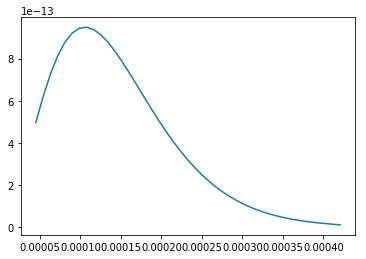

In [369]:
x=data[0]
w=data[1]
print(len(x))
plot(data[0],data[1])

In [370]:
def lag(x, z):

    n = len(x)
    p = poly1d(0.0)
    for i in range(n):
        pt = poly1d(z[i])
        for j in range(n):
            if j == i:
                continue
            frac = x[i]-x[j]
            pt *= poly1d([1.0, -x[j]])/frac
        p += pt

        return p

In [374]:
cosa=lag(data[0],data[1])

In [375]:
t=cosa

u=lagrange(data[0],data[1])
print (u)

            42              41              40              39
3.724e+148 x  - 3.711e+146 x  + 1.796e+144 x  - 5.623e+141 x 
               38              37              36              35
 + 1.281e+139 x  - 2.261e+136 x  + 3.222e+133 x  - 3.808e+130 x 
               34              33              32              31
 + 3.807e+127 x  - 3.268e+124 x  + 2.436e+121 x  - 1.591e+118 x 
               30              29              28              27
 + 9.177e+114 x  - 4.699e+111 x  + 2.146e+108 x  - 8.777e+104 x 
               26             25             24             23
 + 3.224e+101 x  - 1.066e+98 x  + 3.182e+94 x  - 8.576e+90 x 
             22             21             20             19
 + 2.09e+87 x  - 4.607e+83 x  + 9.187e+79 x  - 1.657e+76 x 
            18             17             16             15
 + 2.7e+72 x  - 3.971e+68 x  + 5.263e+64 x  - 6.271e+60 x 
              14             13             12             11
 + 6.702e+56 x  - 6.401e+52 x  + 5.442e+48 x  - 4.097e+

(0, 0.0004)

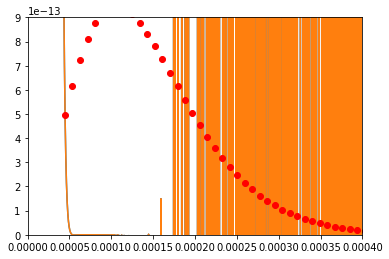

In [376]:
e=linspace(0,0.0004,1000)
plot(e,t(e))
plot(e,u(e))
plot(data[0],data[1],'ro')
ylim(0,9e-13)
xlim(0,0.0004)

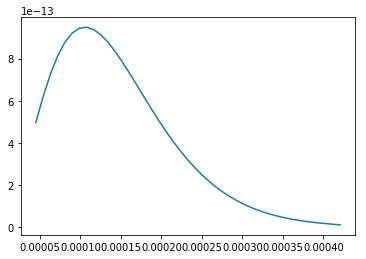

In [346]:
plot(data[0],data[1])

In [331]:
u=lagrange(data[0],data[1])

[7.71577930e-07 7.71577930e-07 7.71577930e-07 ... 7.71577763e-07
 7.71577763e-07 7.71577763e-07]


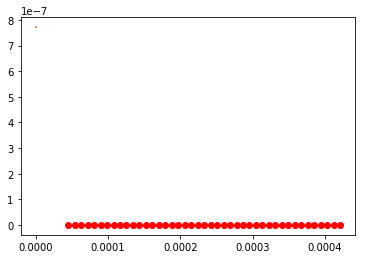

In [303]:
x=linspace(0,9e-13,1000000)
plot (x,t(x))
plot(x,u(x))
print(u(x))
plot(data[0],data[1],'ro')

In [1]:
def interp(x,x_i,y_i):
    L = []
    a = []
    for k in range(len(x_i)):
        numer = np.ones(len(x))
        denom = np.ones(len(x))
        for i in range(len(x_i)):
            if i != k:
                a = x - x_i[i]
                numer = a*numer 
                b = x_i[k] - x_i[i]
                denom = b*denom   
        L.append(np.divide(numer,denom))
    ac = np.zeros(len(L[0]))
    for k in range(len(y_i)):
        ac = ac + L[k]*y_i[k]
    return ac


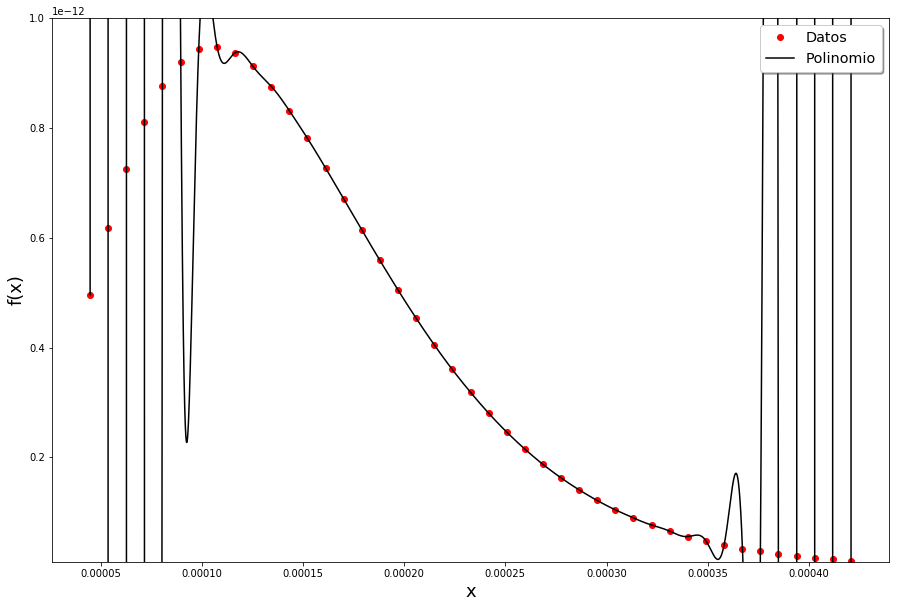

In [390]:
data = np.loadtxt('cmb_monopole.dat').T

x_i = data[0]
y_i = data[1]

x = np.linspace(np.min(x_i),np.max(x_i),10000)
P = interp(x,x_i,y_i)
u=lagrange(data[0],data[1])


plt.figure(figsize=(15,10))
plt.plot(x_i,y_i,'ro',label='Datos')
plt.plot(x,P,'k-' , label='Polinomio')
#plt.plot(x,u(x),'b-' , label='Polinomio2')

plt.xlabel("x",fontsize=18)
plt.ylabel("f(x)",fontsize=18)
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.ylim(1e-14,1e-12)

plt.show()